In [15]:
%matplotlib widget
import numpy as np

In [16]:
import matplotlib.pylab as plt

In [236]:
n_M, n_N = 4,5

In [237]:
M_idx, N_idx = np.mgrid[0:n_M:1, 0:n_N:1]

In [238]:
M_idx.T, N_idx.T[::-1]

(array([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]]),
 array([[4, 4, 4, 4],
        [3, 3, 3, 3],
        [2, 2, 2, 2],
        [1, 1, 1, 1],
        [0, 0, 0, 0]]))

In [239]:
n_c = min(int((n_M) / 2), int(n_N / 2))
n_A_depth = min(int(n_M / 2), int((n_N+1) / 2))
n_B_depth = min(int((n_M+1) / 2), int(n_N / 2))
n_C_depth = min(int((n_M) / 2), int(n_N / 2))
n_D_depth = min(int((n_M) / 2), int(n_N / 2))
n_c, n_A_depth, n_B_depth, n_C_depth, n_D_depth

(2, 2, 2, 2, 2)

In [240]:
A_M = [M_idx[d: n_M-d-1, -1-d] for d in range(n_A_depth)]
A_N = [N_idx[d: n_M-d-1, -1-d] for d in range(n_A_depth)]
A_M, A_N

([array([0, 1, 2]), array([1])], [array([4, 4, 4]), array([3])])

In [241]:
B_M = [M_idx[-1-d, d+1: n_N-d] for d in range(n_B_depth)]
B_N = [N_idx[-1-d, d+1: n_N-d][::-1] for d in range(n_B_depth)]
B_M, B_N

([array([3, 3, 3, 3]), array([2, 2])], [array([4, 3, 2, 1]), array([3, 2])])

In [242]:
C_M = [M_idx[d+1: n_M-d, d][::-1] for d in range(n_C_depth)]
C_N = [N_idx[d+1: n_M-d, d] for d in range(n_C_depth)]
C_M, C_N

([array([3, 2, 1]), array([2])], [array([0, 0, 0]), array([1])])

In [243]:
D_M = [M_idx[d, d: n_N-d-1] for d in range(n_D_depth)]
D_N = [N_idx[d, d: n_N-d-1] for d in range(n_D_depth)]
D_M, D_N

([array([0, 0, 0, 0]), array([1, 1])], [array([0, 1, 2, 3]), array([1, 2])])

In [244]:
if n_A_depth < n_B_depth:
    E_M = B_M[-1] # + [M_idx[n_A_depth, -n_B_depth]]
    E_N = B_N[-1] # + [N_idx[n_A_depth, -n_B_depth]]
elif n_A_depth > n_B_depth:
    E_M = A_M[-1] # + [M_idx[n_A_depth, -n_B_depth]]
    E_N = A_N[-1] # + [N_idx[n_A_depth, -n_B_depth]]
else:
    E_M = np.array([], np.int_)
    E_N = np.array([], np.int_)

In [245]:
F_M, F_N = [], []
if n_M % 2 != 0 or n_N % 2 != 0:
    F_M = [M_idx[n_A_depth, -n_B_depth-1]]
    F_N = [N_idx[n_A_depth, -n_B_depth-1]]

In [246]:
F_M, F_N

([2], [2])

In [247]:
c_M = np.hstack([np.hstack([A_M[c], B_M[c], C_M[c], D_M[c]]) for c in range(n_c)] 
                + [E_M] + F_M)
c_N = np.hstack([np.hstack([A_N[c], B_N[c], C_N[c], D_N[c]]) for c in range(n_c)] 
                + [E_N] + F_N)

In [248]:
c_N

array([4, 4, 4, 4, 3, 2, 1, 0, 0, 0, 0, 1, 2, 3, 3, 3, 2, 1, 1, 2, 2])

In [249]:
N_idx[c_M, c_N]

array([4, 4, 4, 4, 3, 2, 1, 0, 0, 0, 0, 1, 2, 3, 3, 3, 2, 1, 1, 2, 2])

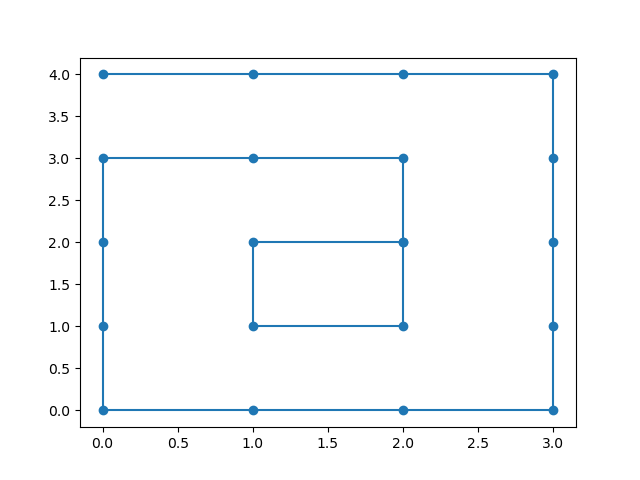

In [250]:
fig, ax = plt.subplots(1,1)
ax.plot(c_M, c_N, '-o')